---
# <center> Title:   2019 Truck Travel Speed and Performance Measure.</center>
<br>
<center>  <h3> Dataset Description<br></h2> </center>

---


<center>  <h3> Ilyas Borjakov. 501145700<br></h2> </center>
<center>  <h3> The G. Raymond Chang School of Continuing Education,<br> </h2> </center>
<center>  <h3> Toronto Metropolitan University<br></h2> </center>
<center>  <h3> CIND820_D1H: Big Data Analytics Project<br></h2> </center>
<center>  <h3> Ashok Bhowmick, Ph. D<br></h2> </center>
<center>  <h3> October 31, 2022<br></h2> </center>

<h3> Importing Libraries </h3>

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d

Loading the Dataset

In [3]:
df = pd.read_csv("2019_travel_speed_and_performance_measure-truck.csv")

Changing settings to view all the attributes

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.sample(10)

,FID,OGF_ID,LENGTH,EXITNUM,LANES,RDCLASS,ROUTENUM,SPDLIM,ROUTE_NAME,FULLNAME,DIRECTIONA,STREET_TYP,STREET_NAM,STREET_T_1,STREET_DIR,ORNICID,AZIMUTH,STATE,COUNTRY,ICID,FFS,ATS_AM,ATS_PM,ATS_WN,ATS_AM_ADJ,ATS_PM_ADJ,ATS_WN_ADJ,TTI_AM,TTI_PM,TTI_WN,TTI_AM_ADJ,TTI_PM_ADJ,TTI_WN_ADJ,DI_AM,DI_PM,DI_WN,DI_AM_ADJ,DI_PM_ADJ,DI_WN_ADJ,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,BTI_AM_ADJ,BTI_PM_ADJ,BTI_WN_ADJ,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
46037,46038,1500398571,12.722,,2,Collector,0,50,,CORPORATE DRIVE,,,Corporate,Drive,,1500398571,257.463163,ON,Canada,1500398571,0,25,5,0,25,5,0,0.00,0.00,0.00,,,,0,0,0,,,,24,6,0,1.04,0.83,0.00,1.04,0.83,,0,0,0,0,0,0,26,0,24,39,8,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0.000155
242111,242112,1500407471,209.761,,2,Local / Street,0,80,,BOUNDARY ROAD,,,,,,1500407471,320.082468,ON,Canada,1500407471,0,0,0,0,0,0,0,0.00,0.00,0.00,,,,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002117
23255,23256,1500456779,173.233,,2,Collector,0,50,,WOLSELY STREET,,,Wolsely,Street,,1500456779,63.075340,ON,Canada,1500456779,0,48,0,0,48,0,0,0.00,0.00,0.00,,,,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,0,0,0,0,0,0,0,48,0,45,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001988
222501,222502,1500506813,125.328,,2,Collector,0,40,,FORMAN AVENUE,,,Forman,Avenue,,1500506813,40.198106,ON,Canada,1500506813,0,41,0,0,41,0,0,0.00,0.00,0.00,,,,0,0,0,,,,31,0,0,1.32,0.00,0.00,1.32,,,0,0,0,0,0,0,32,41,47,38,38,37,39,18,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001258
92557,92558,1500542897,144.138,,2,Arterial,0,40,,GERRARD STREET EAST,,,Gerrard,Street,East,-1500542897,231.415445,ON,Canada,-1500542897,0,0,29,33,0,29,33,0.00,0.00,0.00,,,,0,0,0,,,,0,4,40,0.00,7.25,0.82,,> 2.00,0.82,0,0,0,0,40,0,0,0,0,0,40,34,32,43,34,30,27,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0,0,0,40,0,0,0,0,0,0,0.001529
42126,42127,1500623574,894.257,,1,Ramp,0,40,,HIGHWAY 401,,Highway,401,,,1500623574,239.092320,ON,Canada,1500623574,41,56,46,38,56,46,38,1.00,1.00,1.08,1,1,1.08,0,0,7,,,7,20,12,6,2.80,3.83,6.33,> 2.00,> 2.00,> 2.00,46,57,64,63,64,63,63,59,50,59,61,61,60,57,52,47,47,45,45,45,41,42,27,32,34,49,53,55,64,61,48,54,47,47,40,39,34,36,35,29,24,37,29,41,55,35,34,45,0.009888
140898,140899,1500627861,125.307,,2,Arterial,0,50,,BROADWAY,,,Broadway,,,-1500627861,134.150695,ON,Canada,-1500627861,41,37,29,28,37,29,28,1.11,1.41,1.46,1.11,1.41,1.46,9,36,41,9,36,41,24,15,7,1.54,1.93,4.00,1.54,1.93,> 2.00,0,34,47,47,6,13,28,41,40,33,35,28,30,32,34,35,28,31,42,29,40,39,0,14,0,40,0,0,0,0,0,0,0,16,29,43,0,0,0,47,0,0,0,0,39,0,0,0,0.001299
230559,230560,1500397756,114.393,,2,Arterial,42,50,,ONTARIO STREET,,,Ontario,Street,,1500397756,304.165041,ON,Canada,1500397756,43,0,0,47,0,0,47,0.00,0.00,1.00,,,1,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,43,0,0,0,0,0,0,0,0,0,43,39,42,45,45,0,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0,47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001240
64109,64110,1500455753,48.327,,1,Collector,0,40,,GRENOBLE DRIVE,,,Grenoble,Drive,,1500455753,99.813465,ON,Canada,1500455753,0,2,0,0,2,0,0,0.00,0.00,0.00,,,,0,0,0,,,,0,0,0,0.00,0.00,0.00,,,,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000586
209857,209858,1500559343,2032.458,,2,Expressway / Highway,28,80,,HIGHWAY 28,,Highway,28,,,1500559343,73.803362,ON,Canada,1500559343,84,54,68,39,54,68,39,1.56,1.24,2.15,1.56,1.24,> 2.00,24,10,49,24,10,49,12,74,34,4.50,0.92,1.15,> 2.00,0.92,1.15,0,0,84,85,39,48,44,78,62,79,63,5

At first look, ATS_AM (link level average travel speed during AM peak) and ATS_AM_ADJ (adjusted link level average travel speed during AM peak) populated with the same values almost all the time.<br> 
The same was true for all the other fields which have ADJ additives.<br>

That will make 12 columns redundant, and those fields will be removed while performing data cleaning.<br>
ATS_AM_ADJ,  ATS_PM_ADJ,  ATS_WN_ADJ,<br> 
TTI_AM_ADJ,  TTI_PM_ADJ,  TTI_WN_ADJ,<br>
DI_AM_ADJ,   DI_PM_ADJ,   DI_WN_ADJ,<br>
BTI_AM_ADJ,  BTI_PM_ADJ,  BTI_WN_ADJ<br>

In [6]:
df['Same?'] = df['ATS_AM'] == df['ATS_AM_ADJ']
df['Same?'].value_counts()

True     287640
False         7
Name: Same?, dtype: int64

In [7]:
df['Same?'] = df['ATS_PM'] == df['ATS_PM_ADJ']
df['Same?'].value_counts()

True     287643
False         4
Name: Same?, dtype: int64

In [8]:
df['Same?'] = df['ATS_WN'] == df['ATS_WN_ADJ']
df['Same?'].value_counts()

True     287640
False         7
Name: Same?, dtype: int64

Checking if OGF_ID is the same as ORNICID.<br>
When comparing OGF_ID to ORNICID, it identified that it matches only 55% of the time.

In [9]:
df['Same?'] = df['OGF_ID'] == df['ORNICID']
df['Same?'].value_counts()

True     159287
False    128360
Name: Same?, dtype: int64

ICID and ORNICID represent the same.<br>

In [10]:
df['Same?'] = df['ICID'] == df['ORNICID']
df['Same?'].value_counts()

True    287647
Name: Same?, dtype: int64

FID field is containing 0 helpful information.<br> 
By removing ORNICID and FID, I can reduce the total attribute count by 14.

Checking all the columns in the dataset

In [11]:
df.columns

Index(['FID', 'OGF_ID', 'LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM',
       'SPDLIM', 'ROUTE_NAME', 'FULLNAME', 'DIRECTIONA', 'STREET_TYP',
       'STREET_NAM', 'STREET_T_1', 'STREET_DIR', 'ORNICID', 'AZIMUTH', 'STATE',
       'COUNTRY', 'ICID', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'ATS_AM_ADJ',
       'ATS_PM_ADJ', 'ATS_WN_ADJ', 'TTI_AM', 'TTI_PM', 'TTI_WN', 'TTI_AM_ADJ',
       'TTI_PM_ADJ', 'TTI_WN_ADJ', 'DI_AM', 'DI_PM', 'DI_WN', 'DI_AM_ADJ',
       'DI_PM_ADJ', 'DI_WN_ADJ', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
       'BTI_PM', 'BTI_WN', 'BTI_AM_ADJ', 'BTI_PM_ADJ', 'BTI_WN_ADJ',
       'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05',
       'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11',
       'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15', 'ATS_WD16', 'ATS_WD17',
       'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23',
       'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 'ATS_WN05'

Checking how many columns this dataset has.

In [12]:
len(df.columns)

98

Reducing the number of columns by removing unnecessary ones.

In [13]:
df1 = df[[  'LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM',
           'SPDLIM', 'ROUTE_NAME', 'FULLNAME', 'DIRECTIONA', 'STREET_TYP',
           'STREET_NAM', 'STREET_T_1', 'STREET_DIR', 'AZIMUTH', 'STATE',
           'COUNTRY', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 
           'TTI_AM', 'TTI_PM', 'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN', 
           'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
           'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05',
           'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11',
           'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15', 'ATS_WD16', 'ATS_WD17',
           'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23',
           'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 'ATS_WN05',
           'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09', 'ATS_WN10', 'ATS_WN11',
           'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15', 'ATS_WN16', 'ATS_WN17',
           'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23',
           'SHAPE_Length']]

Only 81 columns left.

In [14]:
len(df1.columns)

81

Checking data type of each column.

In [15]:
df1.dtypes

LENGTH          float64
EXITNUM          object
LANES             int64
RDCLASS          object
ROUTENUM          int64
SPDLIM            int64
ROUTE_NAME       object
FULLNAME         object
DIRECTIONA       object
STREET_TYP       object
STREET_NAM       object
STREET_T_1       object
STREET_DIR       object
AZIMUTH         float64
STATE            object
COUNTRY          object
FFS               int64
ATS_AM            int64
ATS_PM            int64
ATS_WN            int64
TTI_AM          float64
TTI_PM          float64
TTI_WN          float64
DI_AM             int64
DI_PM             int64
DI_WN             int64
P95TH_AM          int64
P95TH_PM          int64
P95TH_WN          int64
BTI_AM          float64
BTI_PM          float64
BTI_WN          float64
ATS_WD00          int64
ATS_WD01          int64
ATS_WD02          int64
ATS_WD03          int64
ATS_WD04          int64
ATS_WD05          int64
ATS_WD06          int64
ATS_WD07          int64
ATS_WD08          int64
ATS_WD09        

In [16]:
df1.sample(10)

,LENGTH,EXITNUM,LANES,RDCLASS,ROUTENUM,SPDLIM,ROUTE_NAME,FULLNAME,DIRECTIONA,STREET_TYP,STREET_NAM,STREET_T_1,STREET_DIR,AZIMUTH,STATE,COUNTRY,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
159338,185.837,,2,Local / Street,0,50,,ALBERT STREET,,,Albert,Street,,115.128501,ON,Canada,49,42,42,56,1.17,1.17,1.0,12,12,0,0,0,0,0.00,0.00,0.00,49,0,0,0,47,0,0,0,42,0,21,56,0,0,45,0,42,0,0,43,0,0,0,0,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002134
270508,199.296,,2,Collector,0,40,,GREY STREET,,,Grey,Street,,86.330025,ON,Canada,0,30,31,0,0.00,0.00,0.0,0,0,0,26,0,0,1.15,0.00,0.00,0,0,0,0,0,0,0,34,26,19,43,31,0,0,0,31,0,0,0,0,0,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002447
47261,66.277,,1,Ramp,0,60,,MEADOWVALE ROAD,,,,,,24.387057,ON,Canada,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,8,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000631
247067,705.184,,2,Collector,0,50,,FISHER DRIVE,,,Fisher,Drive,,69.332920,ON,Canada,34,29,34,49,1.17,1.00,1.0,18,0,0,9,5,12,3.22,6.80,4.08,0,0,34,0,37,0,29,29,32,37,44,31,30,28,51,47,29,38,47,0,0,0,0,0,0,0,0,0,0,0,0,59,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.008260
77952,622.265,,2,Arterial,67,80,,MUNICIPAL ROAD,,,Municipal,Road,,190.099107,ON,Canada,86,85,91,89,1.01,1.00,1.0,0,0,0,78,89,87,1.09,1.02,1.02,84,87,87,0,91,70,89,77,89,93,87,0,90,87,85,93,90,90,0,93,0,89,0,89,0,0,0,0,0,74,0,0,0,87,0,90,0,90,0,0,0,0,0,0,0,0,0,0,0.005701
84946,158.719,,2,Collector,0,40,,WORTH BOULEVARD,,,Worth,Boulevard,,228.742864,ON,Canada,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001673
181687,138.984,,2,Collector,0,50,,BETHUNE STREET,,,Bethune,Street,,175.402368,ON,Canada,21,0,0,0,0.00,0.00,0.0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,18,22,22,0,0,0,0,26,27,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001253
226202,157.803,,2,Expressway / Highway,21,60,Bluewater Veterans Highway,HIGHWAY 21,,Highway,21,,,274.229110,ON,Canada,56,58,35,0,1.00,1.60,0.0,0,39,0,44,71,0,1.32,0.49,0.00,0,56,0,0,61,0,57,61,55,59,67,63,59,59,62,0,0,71,47,0,0,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001984
175842,111.210,,2,Arterial,0,50,,MOSLEY STREET,,,Mosley,Street,,203.920943,ON,Canada,0,22,0,0,0.00,0.00,0.0,0,0,0,5,0,0,4.40,0.00,0.00,0,0,0,0,0,0,0,0,22,17,27,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001058
246600,133.453,,2,Local / Street,0,50,,BRUCE STREET,,,Bruce,Street,,296.195019,ON,Canada,0,0,0,0,0.00,0.00,0.0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001537


Checking the values of DIRCTIONA attribute.

In [17]:
df1.DIRECTIONA.values

array([' ', ' ', ' ', ..., ' ', ' ', ' '], dtype=object)

The above query shows that the field contains a lot of values which is a space,  not useful.

In [18]:
df[df['DIRECTIONA'] == ' '].index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            287637, 287638, 287639, 287640, 287641, 287642, 287643, 287644,
            287645, 287646],
           dtype='int64', length=285473)

As a result, this column can be removed as it mainly contains space, and the information in this column still exist in the other field.

In [19]:
a = df['DIRECTIONA'].unique()
print(sorted(a))

[' ', 'East', 'North', 'South', 'West']


Checking the unique values in the street_type attributes.

In [20]:
a = df['STREET_TYP'].unique()
print(sorted(a))

[' ', 'Avenue', 'Boulevard', 'Chemin', 'Concession', 'Concession Road', 'County Road', 'Fire Route', 'Glen', 'Haven', 'Highway', 'Lake', 'Line', 'Parc', 'Parkway', 'Place', 'Promenade', 'Regional Road', 'Road', 'Route', 'Rue', 'Service', 'Shore', 'Sideline', 'Sideroad', 'Townline', 'Via']


Many attributes contain spaces in the dataset and thus will be replaced with NaN.

In [21]:
df2 = df1.replace(r'^\s*$', np.nan, regex = True)

Checking how many rows has not null values

In [22]:
df2['STREET_TYP'].notnull().sum()

41532

In [23]:
df3 = df2.replace(' ', np.nan)

Checking for Unique values in EXITNUM column.<br>

In [24]:
df3.EXITNUM.unique()

array([nan, '153', '220', '213', '207', '214', '217', '224', '229', '231',
       '236', '344', '338', '113', '110', '241', '128', '129', '131A',
       '131', '135', '248', '27', '30', '41', '38', '232', '230', '222',
       '218', '216', '235', '244', '221', '219', '250', '36', '34', '351',
       '350', '352', '348', '21', '357', '120', '118', '75', '54', '53',
       '415', '412', '95', '98', '139', '29', '26', '73', '419', '418',
       '121', '126', '16', '306', '301', '294', '289', '282', '6', '238',
       '276', '270', '266', '261', '257', '77', '359', '21B', '355',
       '356', '354', '69', '63', '116', '123', '88', '90', '362', '20',
       '21A', '28', '107', '105', '102', '99', '100', '101', '1', '78',
       '74', '189', '186', '177', '177B', '177A', '324', '97', '93',
       '389', '86', '119', '109', '111', '383', '381', '117', '392',
       '390', '83', '122', '44', '12', '448', '440', '144', '142', '157',
       '149', '47', '401', '399', '397', '51', '49', '48', '55

In [25]:
df3.shape

(287647, 81)

Checking for missing values.

In [26]:
df3['EXITNUM'].isnull().sum()

286678

EXITNUM is mainly filled with Null values. Only 969 out of 287,647 rows have values. <br>
As only 0.3% of the data has an EXITNUM, this column will have minimal effect on the dataset and can be dropped.

In [27]:
df3.FULLNAME.unique()

array(['ELORA STREET', 'ABSALOM STREET WEST', 'MURPHY DRIVE', ...,
       'WHEELER AVENUE', 'CHRISTIE DRIVE', 'HACIENDA ROAD'], dtype=object)

FULLNAME attribute contains the data from 'DIRECTIONA', 'STREET_NAM', 'STREET_T_1', 'STREET_DIR'.<br>
As a result of the observation, those fields are redundant and can be removed, further reducing the column count.

In [28]:
df3['COUNTRY'].unique()

array(['Canada'], dtype=object)

The above line will be another example of a field which do not have value for future analysis.<br>
Other columns to be dropped are the OGF_ID, ICID, STATE and COUNTRY.

In [29]:
df3 = df3[['LENGTH', 'EXITNUM', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM',
       'ROUTE_NAME', 'FULLNAME', 'STREET_TYP', 'AZIMUTH',
       'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM', 'TTI_WN',
       'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
       'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03',
       'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
       'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15',
       'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21',
       'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03',
       'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
       'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15',
       'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21',
       'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

By checking for missing values in the dataset.<br>
It was observed that EXITNUM, ROUTE_NAME, FULLNAME and STREET_TYP have missing values.<br>
Out of those four, FULLNAME has the least, only 1043 (0.4%) of total rows.<br>
On the other hand, EXITNUM, ROUTE_NAME and STREET_TYP have a very high number of missing values.<br>
They are 99.7%, 93.7% and 85.6% of total records respectively.<br>

In [30]:
df3.isna().sum()

LENGTH               0
EXITNUM         286678
LANES                0
RDCLASS              0
ROUTENUM             0
SPDLIM               0
ROUTE_NAME      269404
FULLNAME          1043
STREET_TYP      246115
AZIMUTH              0
FFS                  0
ATS_AM               0
ATS_PM               0
ATS_WN               0
TTI_AM               0
TTI_PM               0
TTI_WN               0
DI_AM                0
DI_PM                0
DI_WN                0
P95TH_AM             0
P95TH_PM             0
P95TH_WN             0
BTI_AM               0
BTI_PM               0
BTI_WN               0
ATS_WD00             0
ATS_WD01             0
ATS_WD02             0
ATS_WD03             0
ATS_WD04             0
ATS_WD05             0
ATS_WD06             0
ATS_WD07             0
ATS_WD08             0
ATS_WD09             0
ATS_WD10             0
ATS_WD11             0
ATS_WD12             0
ATS_WD13             0
ATS_WD14             0
ATS_WD15             0
ATS_WD16             0
ATS_WD17   

In [31]:
df3.dtypes

LENGTH          float64
EXITNUM          object
LANES             int64
RDCLASS          object
ROUTENUM          int64
SPDLIM            int64
ROUTE_NAME       object
FULLNAME         object
STREET_TYP       object
AZIMUTH         float64
FFS               int64
ATS_AM            int64
ATS_PM            int64
ATS_WN            int64
TTI_AM          float64
TTI_PM          float64
TTI_WN          float64
DI_AM             int64
DI_PM             int64
DI_WN             int64
P95TH_AM          int64
P95TH_PM          int64
P95TH_WN          int64
BTI_AM          float64
BTI_PM          float64
BTI_WN          float64
ATS_WD00          int64
ATS_WD01          int64
ATS_WD02          int64
ATS_WD03          int64
ATS_WD04          int64
ATS_WD05          int64
ATS_WD06          int64
ATS_WD07          int64
ATS_WD08          int64
ATS_WD09          int64
ATS_WD10          int64
ATS_WD11          int64
ATS_WD12          int64
ATS_WD13          int64
ATS_WD14          int64
ATS_WD15        

In [32]:
df3.shape

(287647, 75)

Checking for unique values in ROUTE_NAME

In [33]:
df3['ROUTE_NAME'].unique()

array([nan, 'Bluewater Route', 'Bluewater Veterans Highway',
       'Bluewater Highway', 'Talbot Trail', 'Algonquin Trail',
       'Wine Route', 'Trans-Canada Highway', 'Queen Elizabeth Way',
       'Great River Road', 'Voyageur Route', 'Frontier Route',
       'Route of Heroes', 'Taste Trail', 'Arts Trail',
       'African-Canadian Heritage Tour', 'Oil Heritage Route',
       'Deer Trail Route', 'Terry Fox Courage Highway',
       'Route Transcanadienne', 'Golden Highway', 'The Kingsway',
       'Lake Nipissing Circle Tour', 'Macdonald-Cartier Freeway',
       '407 ETR', 'Highway of Heroes', 'Don Valley Parkway',
       'Gardiner Expressway', 'Red Hill Valley Parkway', 'The Allen',
       'Highbury Avenue', 'Veterans Memorial Parkway',
       'Lincoln M. Alexander Parkway', 'John M Turner Memorial Highway',
       'General Brock Parkway', 'Hanlon Parkway', 'The Queensway',
       'Veterans Memorial Highway', 'E.C. Row Expressway',
       'Rt. Hon. Herb Gray Parkway', 'Falconbridge'], 

Dropping EXITNUM, ROUTE_NAME and STREET_TYP

In [34]:
df4 = df3[['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM',
       'FULLNAME', 'AZIMUTH',
       'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM', 'TTI_WN',
       'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM',
       'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03',
       'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
       'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 'ATS_WD15',
       'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21',
       'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03',
       'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
       'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15',
       'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20', 'ATS_WN21',
       'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

In [35]:
df4.shape

(287647, 72)

In [36]:
df4.dtypes

LENGTH          float64
LANES             int64
RDCLASS          object
ROUTENUM          int64
SPDLIM            int64
FULLNAME         object
AZIMUTH         float64
FFS               int64
ATS_AM            int64
ATS_PM            int64
ATS_WN            int64
TTI_AM          float64
TTI_PM          float64
TTI_WN          float64
DI_AM             int64
DI_PM             int64
DI_WN             int64
P95TH_AM          int64
P95TH_PM          int64
P95TH_WN          int64
BTI_AM          float64
BTI_PM          float64
BTI_WN          float64
ATS_WD00          int64
ATS_WD01          int64
ATS_WD02          int64
ATS_WD03          int64
ATS_WD04          int64
ATS_WD05          int64
ATS_WD06          int64
ATS_WD07          int64
ATS_WD08          int64
ATS_WD09          int64
ATS_WD10          int64
ATS_WD11          int64
ATS_WD12          int64
ATS_WD13          int64
ATS_WD14          int64
ATS_WD15          int64
ATS_WD16          int64
ATS_WD17          int64
ATS_WD18        

Checking the dataset with describe funtction.<br>

By checking the outcome, the maximum speed does not look valid.<br>
Some fields show the max speed is over 150 and reaching even 375, which is unrealistic.<br>

In [37]:
df4.describe()

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
count,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000
mean,450.148965,2.256151,35.132972,58.414675,187.212674,20.688458,25.020786,24.682023,21.514634,0.634196,0.656034,0.578699,29.398892,32.361690,29.801159,14.377703,14.185648,12.842647,1.493165,1.390026,0.908475,13.154853,12.680494,12.774209,13.463085,14.792033,16.980431,19.358717,21.514898,23.381443,24.843819,25.455962,25.633718,25.503447,25.320059,24.493675,23.023769,21.138604,19.002225,17.584564,16.662785,15.982614,15.371389,14.669286,14.033075,8.760244,7.548370,7.057435,6.858375,7.166013,7.898751,8.820123,9.775541,10.516108,10.623716,10.662159,10.433316,10.189948,9.755363,9.371101,8.816136,8.491658,8.056705,7.633673,7.391779,7.088654,6.526030,6.316287,5.658971,0.004922
std,854.362487,0.797824,218.118051,15.153852,101.616393,29.876022,28.661689,29.097813,29.765881,1.532762,1.597925,1.655194,172.834325,179.374374,197.031189,22.989158,23.345982,23.698775,2.479590,2.386141,1.909132,27.026246,26.792174,26.901153,27.422545,28.088261,28.882065,29.211606,28.976656,28.701570,28.881297,29.008673,29.087739,29.211050,29.317581,29.343089,29.341189,29.279996,28.976681,28.805293,28.638957,28.415831,28.097546,27.715785,27.470987,23.733541,22.596133,22.001784,21.752502,22.156032,22.957359,23.822558,24.726856,25.328612,25.334878,25.288190,25.015540,24.803991,24.490229,24.218349,23.736302,23.522937,23.069425,22.592467,22.381850,22.068221,21.326551,21.072267,20.192725,0.009586
min,3.112000,1.000000,0.000000,5.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
25%,84.675000,2.000000,0.000000,50.000000,89.814344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

This histogram shows that the highest number of lanes is 9.<br>
Also, we can observe that Ontario trucks mainly travel on a two-lane road.<br>
Watching this histogram, An assumption can be made that most of the travel speeds are not highway speeds.<br>

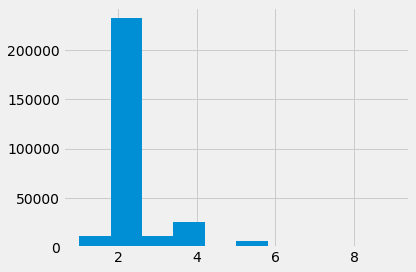

In [38]:
plt.style.use('fivethirtyeight')
plt.hist(df4.LANES)
plt.tight_layout()

A histogram of the roads used by the trucks is plotted below.<br>
When dividing them into the bins of the five different types of roads mainly used by truckers (they are: King's Highway, 400-series highways, Secondary highways, Tertiary roads and 7000-series highways).<br>
The dataset shows that the 7000-series highway is the least used and the next least used road is 400-series highways by the trucks.

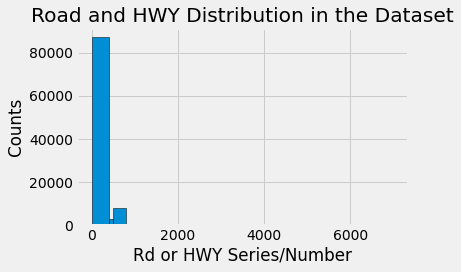

In [39]:
plt.style.use('fivethirtyeight')
bins = [2, 400, 500, 800, 7000]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title("Road and HWY Distribution in the Dataset")

plt.tight_layout()

Because the number of 7000-series highways is so insignificant in the dataset, and there is no record of trucks driving on 800-series highways, it was removed from the bin to see the data distribution for other routes.

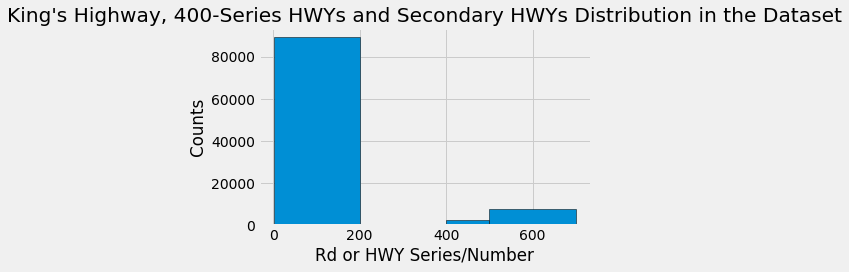

In [40]:
plt.style.use('fivethirtyeight')
bins = [1, 200, 400, 500, 700]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title("King's Highway, 400-Series HWYs and Secondary HWYs Distribution in the Dataset")

plt.tight_layout()

Here we can see that there are around 200 datapoints showing for Tertiary roads and 7000-series highways.

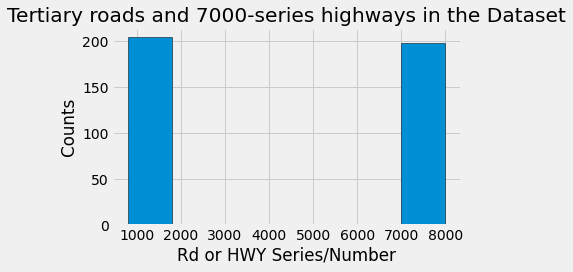

In [41]:
plt.style.use('fivethirtyeight')
bins = [800, 1800, 7000, 8000]

plt.hist(df4.ROUTENUM, bins=bins, edgecolor = 'black')

plt.xlabel('Rd or HWY Series/Number')
plt.ylabel('Counts')
plt.title('Tertiary roads and 7000-series highways in the Dataset')

plt.tight_layout()

The distribution of the road speed limit from this dataset once more confirms the assumption that most of the dataset is collected from the streets with lower speed limits (not a highway).

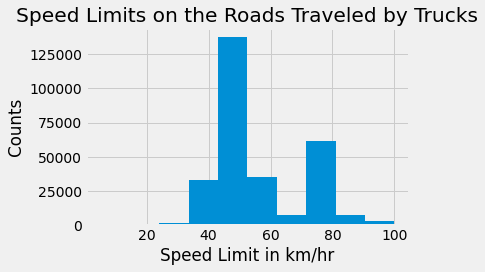

In [42]:
plt.style.use('fivethirtyeight')

plt.hist(df4.SPDLIM)

plt.xlabel('Speed Limit in km/hr')
plt.ylabel('Counts')
plt.title('Speed Limits on the Roads Traveled by Trucks')

plt.tight_layout()

While plotting the histogram of the AZIMUTH where trucks travelled, it immediately resembled the airport runway. 
Why is that? In an airport, runways are named or, more correctly to say numbered, and sometimes the letter is added too. The number on the runway number represents the heading and is rounded to the nearest tenths, and the tail is truncated. For example, if it says runway number 18, it means that this runway is directed to the south at 180 degrees azimuth. The same runway is numbered differently from the other side because if a plane landing from the other end will be heading to the north, azimuth (runway number) will be 0.<br>
Now, the dataset and azimuth travelled by the trucks and illustrated in this histogram showing that if an X amount of trucks travelled to the 70-degree azimuth (highest bar on the histogram), then almost the same X amount travelled 180 degrees opposite direction, hence 250-degree azimuth (another spike at the histogram). In simple terms, an assumption can be made that if the truck went somewhere, the truck returned from there.

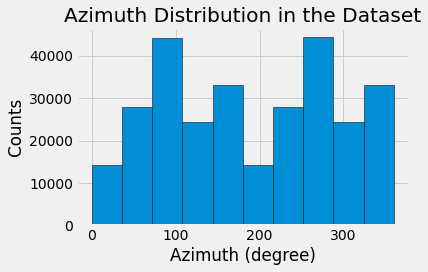

In [43]:
plt.style.use('fivethirtyeight')

plt.hist(df4.AZIMUTH, bins=10, edgecolor = 'black')

plt.xlabel('Azimuth (degree)')
plt.ylabel('Counts')
plt.title('Azimuth Distribution in the Dataset')

plt.tight_layout()

Using Boxplot for free flow speed (FFS), it can be observed that everything above 100 or 110 km/hr is identified as outliers or faulty data points. This is believable, as the truck will not be able to travel with speeds 150 or above.

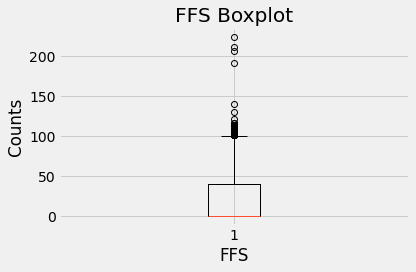

In [44]:
plt.style.use('fivethirtyeight')

plt.boxplot([df4['FFS']])

plt.xlabel('FFS')
plt.ylabel('Counts')
plt.title('FFS Boxplot')

plt.tight_layout()

Using the boxplot outcome, cutting away any speed above 110km/hr, and plotting FFS for this dataset illustrate that most of the FFS on the roads are below 80km/hr. Especially data picks at 50km/hr, presumably a free-flow speed for the town or city.

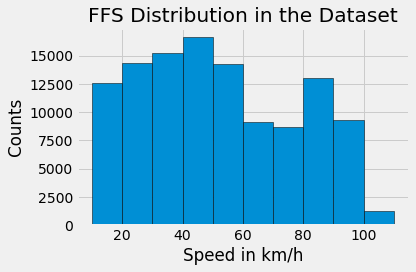

In [45]:
plt.style.use('fivethirtyeight')

bins = [10, 20, 30, 40, 50 , 60, 70, 80, 90, 100, 110]

plt.hist(df4.FFS, bins=bins, edgecolor = 'black')

plt.xlabel('Speed in km/h')
plt.ylabel('Counts')
plt.title('FFS Distribution in the Dataset')

plt.tight_layout()

By utilizing the bar chart, it was checked which roads were mainly used by the trucks (only the top 100 most used roads in the dataset). From the output, we can say that HWY 401 is not in this dataset's top 3 roads used by trucks.

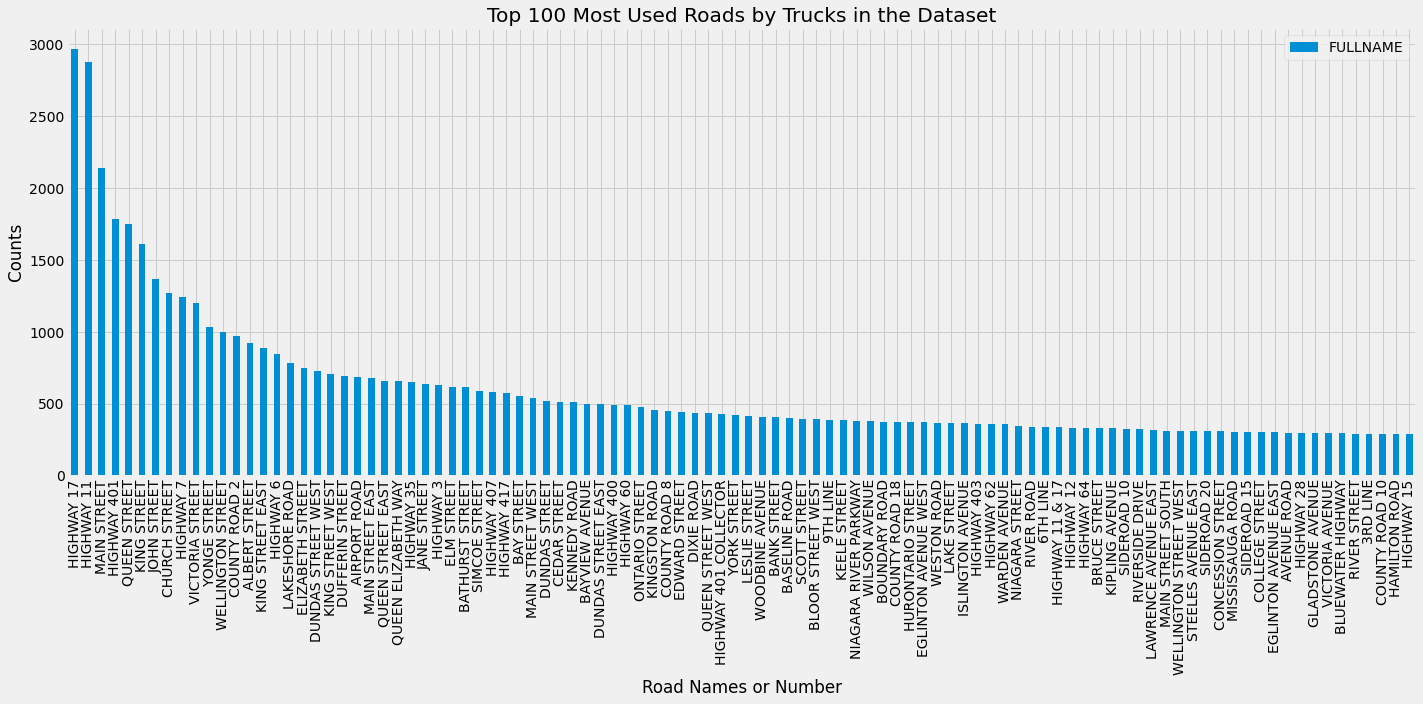

In [46]:
df_bar = pd.DataFrame(df4['FULLNAME'].value_counts())
df_bar = df_bar[:100]
df_bar.plot(kind='bar', figsize = (20,10))

plt.xlabel('Road Names or Number')
plt.ylabel('Counts')
plt.title('Top 100 Most Used Roads by Trucks in the Dataset')

plt.tight_layout()

Sub-datasets were created for visualization purposes to see how speed is affected by the day of the week and the time of the day. Later, data will be divided into each road type and pick the average from the data points related to the same road with the corresponding FFS and speed limits. Right now, all mixed (all the city/town roads with highways) and only spreading the data to weekdays, weekends and times of the day.

In [47]:
df4_WD = df4[['ATS_WD00', 'ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 
              'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08', 'ATS_WD09',
              'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14', 
              'ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 
              'ATS_WD20', 'ATS_WD21', 'ATS_WD22', 'ATS_WD23',]]

df4_WN = df4[['ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04', 
              'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09',
              'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14', 
              'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 
              'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23']]

In [48]:
df4_WD.sample(5)

,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23
26263,0,0,0,0,0,0,0,0,0,0,0,0,0,81,86,0,0,85,84,0,89,90,0,0
283840,0,0,0,0,0,0,0,0,0,47,0,51,0,0,49,0,0,0,0,0,0,0,0,0
114251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76010,0,0,0,0,0,0,0,13,0,8,8,5,5,0,8,0,0,0,0,0,0,0,0,0
91611,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
df4_WN.sample(5)

,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23
215764,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
135806,0,0,0,0,0,0,0,0,0,0,26,0,0,32,0,0,0,0,0,0,0,0,0,0
252207,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63112,-1,26,13,5,14,8,16,31,10,26,19,20,21,50,37,30,10,4,14,27,32,0,43,0
286082,0,0,0,0,0,0,105,92,87,90,0,0,0,0,0,0,0,0,0,0,0,0,77,0


Sub_datasets contain many zeros, and some go for all the columns. Rows with all columns equal to zero need to be removed from the sub-dataset to get meaningful data and plot them.
I will average the data from both sub_dataset and save it for further plotting.<br>

Removing rows where all the columns are 0 (zero).

In [50]:
df4_WN_1 = df4_WN.replace(0, np.nan)
df4_WN_1 = df4_WN_1.dropna(how='all', axis=0)
df4_WN_1 = df4_WN_1.replace(np.nan, 0)

df4_WD_1 = df4_WD.replace(0, np.nan)
df4_WD_1 = df4_WD_1.dropna(how='all', axis=0)
df4_WD_1 = df4_WD_1.replace(np.nan, 0)

The data from both sub_dataset are averaged and saved for further plotting.

In [51]:
df4_WD_mean = df4_WN_1.mean().round(2)
df4_WN_mean = df4_WD_1.mean().round(2)

Checking the mean values for the Week day (WD).

In [52]:
df4_WD_mean

ATS_WN00    18.81
ATS_WN01    16.21
ATS_WN02    15.16
ATS_WN03    14.73
ATS_WN04    15.39
ATS_WN05    16.96
ATS_WN06    18.94
ATS_WN07    20.99
ATS_WN08    22.58
ATS_WN09    22.81
ATS_WN10    22.90
ATS_WN11    22.40
ATS_WN12    21.88
ATS_WN13    20.95
ATS_WN14    20.12
ATS_WN15    18.93
ATS_WN16    18.24
ATS_WN17    17.30
ATS_WN18    16.39
ATS_WN19    15.87
ATS_WN20    15.22
ATS_WN21    14.01
ATS_WN22    13.56
ATS_WN23    12.15
dtype: float64

Checking the mean values for the Weekend (WN).

In [54]:
df4_WN_mean

ATS_WD00    15.88
ATS_WD01    15.31
ATS_WD02    15.42
ATS_WD03    16.26
ATS_WD04    17.86
ATS_WD05    20.50
ATS_WD06    23.38
ATS_WD07    25.98
ATS_WD08    28.23
ATS_WD09    30.00
ATS_WD10    30.74
ATS_WD11    30.95
ATS_WD12    30.80
ATS_WD13    30.57
ATS_WD14    29.58
ATS_WD15    27.80
ATS_WD16    25.53
ATS_WD17    22.95
ATS_WD18    21.23
ATS_WD19    20.12
ATS_WD20    19.30
ATS_WD21    18.56
ATS_WD22    17.71
ATS_WD23    16.95
dtype: float64

All the data from the Red Hill Valley Parkway were collected in one place where RDCLASS equals Freeway. This is done because Red Hill Valley Parkway also has a ramp speed which will influence the average, turning the data into the NumPy series using the code below.

In [55]:
RED_HILL_VALLEY_PARKWAY_FRWY = df4.loc[df4['FULLNAME'] 
                                             == 'RED HILL VALLEY PARKWAY'].loc[df4['RDCLASS'] == 'Freeway'].mean().round(2)
RED_HILL_VALLEY_PARKWAY_FRWY

C:\Users\ilyas\AppData\Local\Temp\ipykernel_27772\2890058550.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  == 'RED HILL VALLEY PARKWAY'].loc[df4['RDCLASS'] == 'Freeway'].mean().round(2)


LENGTH          697.51
LANES             2.42
ROUTENUM          0.00
SPDLIM           90.00
AZIMUTH         146.42
FFS              83.75
ATS_AM           72.83
ATS_PM           63.42
ATS_WN           82.96
TTI_AM            1.16
TTI_PM            1.52
TTI_WN            1.02
DI_AM             6.88
DI_PM            22.58
DI_WN             0.88
P95TH_AM         49.50
P95TH_PM         42.67
P95TH_WN         69.50
BTI_AM            1.60
BTI_PM            1.80
BTI_WN            1.20
ATS_WD00         83.96
ATS_WD01         83.88
ATS_WD02         83.25
ATS_WD03         82.67
ATS_WD04         81.92
ATS_WD05         81.33
ATS_WD06         78.38
ATS_WD07         74.21
ATS_WD08         69.83
ATS_WD09         75.17
ATS_WD10         78.88
ATS_WD11         80.25
ATS_WD12         81.00
ATS_WD13         81.62
ATS_WD14         79.71
ATS_WD15         67.33
ATS_WD16         63.00
ATS_WD17         60.88
ATS_WD18         70.75
ATS_WD19         81.46
ATS_WD20         82.21
ATS_WD21         82.67
ATS_WD22   

Average speed for Weekday hours (0 means midnight and 23 is 11pm)

In [56]:
ATS_WD_Hours = RED_HILL_VALLEY_PARKWAY_FRWY[21:45]
ATS_WD_Hours

ATS_WD00    83.96
ATS_WD01    83.88
ATS_WD02    83.25
ATS_WD03    82.67
ATS_WD04    81.92
ATS_WD05    81.33
ATS_WD06    78.38
ATS_WD07    74.21
ATS_WD08    69.83
ATS_WD09    75.17
ATS_WD10    78.88
ATS_WD11    80.25
ATS_WD12    81.00
ATS_WD13    81.62
ATS_WD14    79.71
ATS_WD15    67.33
ATS_WD16    63.00
ATS_WD17    60.88
ATS_WD18    70.75
ATS_WD19    81.46
ATS_WD20    82.21
ATS_WD21    82.67
ATS_WD22    83.67
ATS_WD23    85.71
dtype: float64

Average speed for Weekend hours (0 means midnight and 23 is 11pm).

In [57]:
ATS_WN_Hours = RED_HILL_VALLEY_PARKWAY_FRWY[45:69]
ATS_WN_Hours

ATS_WN00    84.58
ATS_WN01    84.58
ATS_WN02    80.46
ATS_WN03    80.12
ATS_WN04    82.38
ATS_WN05    83.50
ATS_WN06    85.71
ATS_WN07    85.67
ATS_WN08    86.04
ATS_WN09    85.88
ATS_WN10    83.75
ATS_WN11    82.12
ATS_WN12    79.04
ATS_WN13    81.38
ATS_WN14    80.08
ATS_WN15    80.46
ATS_WN16    82.54
ATS_WN17    83.12
ATS_WN18    84.75
ATS_WN19    85.71
ATS_WN20    84.00
ATS_WN21    83.46
ATS_WN22    83.62
ATS_WN23    82.50
dtype: float64

This is not the final plot, will further develop my idea.

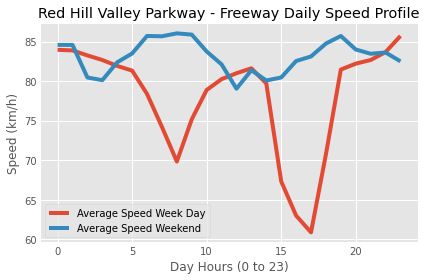

In [58]:
plt.style.use('ggplot')

plt.plot(ATS_WD_Hours.values, label = 'Average Speed Week Day', )
plt.plot(ATS_WN_Hours.values, label = 'Average Speed Weekend')

plt.xlabel('Day Hours (0 to 23)')
plt.ylabel('Speed (km/h)')
plt.title('Red Hill Valley Parkway - Freeway Daily Speed Profile')

plt.legend()

plt.tight_layout()

All the other roads or highways can be plotted into the same plot by bringing the speed percentage in relation to the FFS (free-flow speed) of a given link or road. The difference in speed and FSS value will not ruin the plot because relationships (percentages) will be used instead of actual values.

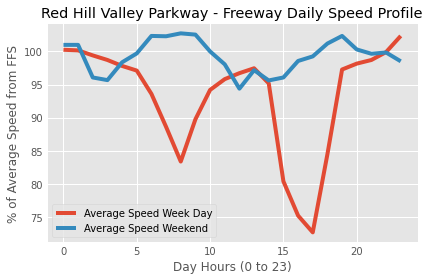

In [59]:
plt.style.use('ggplot')

plt.plot(((ATS_WD_Hours.values / RED_HILL_VALLEY_PARKWAY_FRWY['FFS']) * 100).round(2), label = 'Average Speed Week Day')
plt.plot(((ATS_WN_Hours.values / RED_HILL_VALLEY_PARKWAY_FRWY['FFS']) * 100).round(2), label = 'Average Speed Weekend')

plt.xlabel('Day Hours (0 to 23)')
plt.ylabel('% of Average Speed from FFS')
plt.title('Red Hill Valley Parkway - Freeway Daily Speed Profile')

plt.legend()

plt.tight_layout()

More and more data shows me that the congestion might not be where initially assumed at the beginning of this work. Initially, as a driver travelling in and around Toronto for work and other stuff, one might think that the main congestion for the trucks will be on HWY 401 or QEW. However, the dataset tries to tell that there are more things to uncover.

https://github.com/ilyasbh/CIND820/blob/main/CIND820_Project_IB.ipynb

## Stage 3: Initial Results

### Removing Outliers using interquartile range (IQR)

Checking the columns with describe function.

In [61]:
df4.describe()

,LENGTH,LANES,ROUTENUM,SPDLIM,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
count,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000,287647.000000
mean,450.148965,2.256151,35.132972,58.414675,187.212674,20.688458,25.020786,24.682023,21.514634,0.634196,0.656034,0.578699,29.398892,32.361690,29.801159,14.377703,14.185648,12.842647,1.493165,1.390026,0.908475,13.154853,12.680494,12.774209,13.463085,14.792033,16.980431,19.358717,21.514898,23.381443,24.843819,25.455962,25.633718,25.503447,25.320059,24.493675,23.023769,21.138604,19.002225,17.584564,16.662785,15.982614,15.371389,14.669286,14.033075,8.760244,7.548370,7.057435,6.858375,7.166013,7.898751,8.820123,9.775541,10.516108,10.623716,10.662159,10.433316,10.189948,9.755363,9.371101,8.816136,8.491658,8.056705,7.633673,7.391779,7.088654,6.526030,6.316287,5.658971,0.004922
std,854.362487,0.797824,218.118051,15.153852,101.616393,29.876022,28.661689,29.097813,29.765881,1.532762,1.597925,1.655194,172.834325,179.374374,197.031189,22.989158,23.345982,23.698775,2.479590,2.386141,1.909132,27.026246,26.792174,26.901153,27.422545,28.088261,28.882065,29.211606,28.976656,28.701570,28.881297,29.008673,29.087739,29.211050,29.317581,29.343089,29.341189,29.279996,28.976681,28.805293,28.638957,28.415831,28.097546,27.715785,27.470987,23.733541,22.596133,22.001784,21.752502,22.156032,22.957359,23.822558,24.726856,25.328612,25.334878,25.288190,25.015540,24.803991,24.490229,24.218349,23.736302,23.522937,23.069425,22.592467,22.381850,22.068221,21.326551,21.072267,20.192725,0.009586
min,3.112000,1.000000,0.000000,5.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000011
25%,84.675000,2.000000,0.000000,50.000000,89.814344,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

Calculating Q1 and Q2 for each column where possible outliers might be located. Starting with free flow speed (FFS).

Steps will be explained for the first attribute, and later same procedure will be applied to all the attributes with the outliers.<br>
Finding first and third quartiles.

In [62]:
Q1_FFS = df4.FFS.quantile(0.25)
Q3_FFS = df4.FFS.quantile(0.75)
Q1_FFS, Q3_FFS

(0.0, 40.0)

In [64]:
IQR_FFS = Q3_FFS - Q1_FFS
IQR_FFS

40.0

Check for Upper Limit where it can be cut off and considered an Outlier.

In [66]:
upp_lim_FFS = Q3_FFS + 1.5 * IQR_FFS
upp_lim_FFS

100.0

Which one of those datapoints is an outlier for FFS?

In [73]:
df4[df4.FFS > upp_lim_FFS].sample(20)

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,FULLNAME,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
286703,2385.630,2,Arterial,0,80,WESTMINSTER DRIVE,69.526375,105,82,69,68,1.28,1.52,1.54,10,18,19,0,44,0,0.00,1.57,0.00,111,111,111,111,76,0,82,0,0,59,62,86,41,74,58,71,70,48,0,111,111,92,92,111,0,0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.027467
63267,921.980,4,Freeway,403,100,HIGHWAY 403,51.898833,101,36,84,96,2.81,1.20,1.05,64,7,2,12,44,80,3.00,1.91,1.20,102,102,102,102,102,101,78,33,22,33,70,86,89,90,93,92,87,75,76,93,100,100,100,102,101,103,103,99,101,102,103,102,101,103,89,91,97,78,100,99,98,83,98,99,102,96,102,102,0.009862
62250,1080.773,2,Freeway,402,100,HIGHWAY 402,310.616199,101,100,101,101,1.01,1.00,1.00,0,0,0,90,91,95,1.11,1.11,1.06,102,100,100,101,100,100,100,100,100,100,99,100,100,101,100,101,101,100,101,101,101,100,101,102,101,97,98,103,100,101,101,100,102,101,99,102,102,103,100,102,102,103,103,100,95,101,101,100,0.011353
60213,1902.493,2,Freeway,407,100,HIGHWAY 407,123.759790,101,99,100,98,1.02,1.01,1.03,1,0,1,89,92,89,1.11,1.09,1.10,105,102,102,103,103,101,98,100,98,100,99,100,101,102,98,100,100,99,100,101,102,95,98,101,105,100,104,102,100,105,102,101,102,99,101,97,102,101,105,72,100,106,101,101,101,0,26,0,0.020847
58535,215.315,2,Arterial,38,60,BATHURST STREET,170.408787,104,60,60,103,1.73,1.73,1.01,25,25,0,22,6,100,2.73,10.00,1.03,0,101,104,0,0,0,69,48,68,31,44,43,34,25,50,46,78,65,0,85,52,0,0,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,70,0,0,0,0,31,0.001951
2820,1380.751,2,Local / Street,0,80,LAWRENCE ROAD,307.680413,103,100,57,104,1.03,1.81,1.00,1,28,0,0,6,101,0.00,9.50,1.03,0,0,100,0,0,95,0,0,100,0,0,0,107,67,90,102,62,53,55,47,0,79,105,0,0,0,0,0,0,0,0,0,0,0,0,106,0,0,0,105,0,0,0,0,0,97,0,0,0.014717
44433,733.789,2,Ramp,0,60,HIGHWAY 407,87.091700,102,83,90,99,1.23,1.13,1.03,8,5,1,35,85,91,2.37,1.06,1.09,105,103,102,102,92,96,99,86,80,86,97,98,93,102,99,91,103,98,81,104,102,101,98,102,103,100,104,97,0,0,103,105,90,97,98,103,98,104,0,97,100,90,92,106,114,0,0,0,0.008945
56047,5119.349,2,Freeway,401,100,HIGHWAY 401,242.030558,101,101,100,102,1.00,1.01,1.00,0,0,0,94,93,96,1.07,1.08,1.06,101,101,101,101,101,102,102,101,100,101,102,102,102,101,101,99,100,101,101,101,101,101,100,102,102,103,102,100,101,100,101,100,102,100,101,101,100,101,101,102,101,102,102,101,101,101,98,99,0.057100
22311,1518.132,2,Collector,0,80,AIKINS ROAD,333.525916,102,102,90,98,1.00,1.13,1.04,0,5,1,96,43,83,1.06,2.09,1.18,103,103,103,103,0,106,105,100,102,101,99,107,77,70,64,103,86,88,103,71,101,0,95,0,0,0,0,0,0,0,0,0,0,0,0,108,80,0,0,103,90,0,0,0,0,0,0,0,0.014367
56046,5110.075,2,Freeway,401,100,HIGHWAY 401,62.014973,101,102,102,102,1.00,1.00,1.00,0,0,0,98,97,96,1.04,1.05,1.06,101,101,101,101,101,100,102,102,102,101,101,101,102,101,101,101,101,102,101,100,100,101,101,101,101,103,103,102,100,101,102,102,101,102,101,102,101,102,102,102,102,102,102,101,101,101,102,101,0.056992


Looking at the data above, if all those considered outliers by using IQR are thrown away, the dataset might also lose good data.<br> 
The count of rows is considered to be an outlier for FFS (below) equal to 725.

In [72]:
df4.FFS[df4.FFS > upp_lim_FFS].count()

725

By checking the histogram, the decision was made to check how many values are above 120km/hr, which would probably be cut off for outliers.

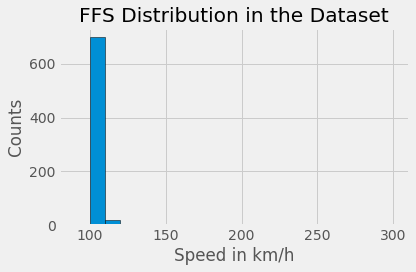

In [75]:
df4.FFS[df4.FFS > upp_lim_FFS]

plt.style.use('fivethirtyeight')

bins = [90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 250, 300]

plt.hist(df4.FFS[df4.FFS > upp_lim_FFS], bins=bins, edgecolor = 'black')

plt.xlabel('Speed in km/h')
plt.ylabel('Counts')
plt.title('FFS Distribution in the Dataset')

plt.tight_layout()

In [77]:
df4.FFS[df4.FFS > 120]

7903      192
57455     211
104370    130
123194    224
151480    140
187713    122
275951    206
Name: FFS, dtype: int64

In [78]:
df4.FFS[df4.FFS > 120].count()

7

Checking if all the speed-related data at those rows also shows meaningless speed (high).

In [79]:
df4[df4.FFS > 120]

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,FULLNAME,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
7903,172.655,2,Collector,0,50,WILLOWBANK TRAIL,41.850558,192,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,192,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.001780
57455,80.216,2,Collector,0,50,SENTINEL ROAD,172.788330,211,0,9,9,0.00,23.44,23.44,0,383,383,0,5,6,0.00,1.80,1.50,0,0,211,0,0,0,0,0,0,0,16,37,0,0,12,10,0,5,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,6,0,0,0,0,0.000728
104370,1123.289,2,Arterial,65,80,BISMARK ROAD,111.178264,130,80,74,70,1.62,1.76,1.86,17,21,24,70,38,64,1.14,1.95,1.09,71,34,0,0,84,78,75,80,83,75,78,68,84,83,63,66,83,74,64,78,78,81,74,150,0,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.013088
123194,1198.288,2,Local / Street,0,80,KING STREET,194.351921,224,192,34,0,1.17,6.59,0.00,3,90,0,0,10,0,0.00,3.40,0.00,0,224,0,0,0,0,192,0,0,0,0,0,0,0,0,6,0,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.011274
151480,1786.478,2,Arterial,65,60,BINBROOK ROAD,102.863411,140,44,65,64,3.18,2.15,2.19,56,30,31,26,55,58,1.69,1.18,1.10,67,55,0,61,57,65,45,56,32,59,66,57,66,64,67,69,59,65,63,66,60,63,47,199,0,0,0,0,0,0,0,0,66,0,58,0,0,0,68,0,0,72,0,0,0,0,0,0,0.021502
187713,85.575,2,Collector,0,50,CAVAN STREET,185.872972,122,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000808
275951,370.397,2,Local / Street,0,50,MURRAY ROSS PARKWAY,276.706012,206,0,0,0,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0.00,0,206,0,0,0,0,0,0,0,0,34,39,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.004378


Running the code above shows that those seven rows contain either erroneous data for speed in other fields or zero.<br> 
Those rows can be easily removed from the dataset.<br>

Dataframe df4c will be used to store the cleaned version of the dataset.

In [81]:
df4c = df4[df4.FFS < 120]

In [83]:
df4c.shape

(287640, 72)

Checking all the labels in Dataframe df4c.

In [102]:
df4c.columns

Index(['LENGTH', 'LANES', 'RDCLASS', 'ROUTENUM', 'SPDLIM', 'FULLNAME',
       'AZIMUTH', 'FFS', 'ATS_AM', 'ATS_PM', 'ATS_WN', 'TTI_AM', 'TTI_PM',
       'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN', 'P95TH_AM', 'P95TH_PM', 'P95TH_WN',
       'BTI_AM', 'BTI_PM', 'BTI_WN', 'ATS_WD00', 'ATS_WD01', 'ATS_WD02',
       'ATS_WD03', 'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07', 'ATS_WD08',
       'ATS_WD09', 'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14',
       'ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20',
       'ATS_WD21', 'ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02',
       'ATS_WN03', 'ATS_WN04', 'ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08',
       'ATS_WN09', 'ATS_WN10', 'ATS_WN11', 'ATS_WN12', 'ATS_WN13', 'ATS_WN14',
       'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18', 'ATS_WN19', 'ATS_WN20',
       'ATS_WN21', 'ATS_WN22', 'ATS_WN23', 'SHAPE_Length'],
      dtype='object')

In [103]:
df4c.dtypes

LENGTH          float64
LANES             int64
RDCLASS          object
ROUTENUM          int64
SPDLIM            int64
FULLNAME         object
AZIMUTH         float64
FFS               int64
ATS_AM            int64
ATS_PM            int64
ATS_WN            int64
TTI_AM          float64
TTI_PM          float64
TTI_WN          float64
DI_AM             int64
DI_PM             int64
DI_WN             int64
P95TH_AM          int64
P95TH_PM          int64
P95TH_WN          int64
BTI_AM          float64
BTI_PM          float64
BTI_WN          float64
ATS_WD00          int64
ATS_WD01          int64
ATS_WD02          int64
ATS_WD03          int64
ATS_WD04          int64
ATS_WD05          int64
ATS_WD06          int64
ATS_WD07          int64
ATS_WD08          int64
ATS_WD09          int64
ATS_WD10          int64
ATS_WD11          int64
ATS_WD12          int64
ATS_WD13          int64
ATS_WD14          int64
ATS_WD15          int64
ATS_WD16          int64
ATS_WD17          int64
ATS_WD18        

---
### Converting zeros to NaN so I can work on them further to clean the dataset.
---

In [204]:
df5c = df4c.replace(0, np.nan)

Dropping the rows where the number of zeros (NaN) is less than 40% and naming the dataframe df5cc

In [219]:
df5cc = df5c.dropna(thresh=44)
df5cc.shape

(71692, 72)

Replacing the NaN values with Zeros.

In [220]:
df6c = df5cc.fillna(0)

In [222]:
df6c.sample(10)

,LENGTH,LANES,RDCLASS,ROUTENUM,SPDLIM,FULLNAME,AZIMUTH,FFS,ATS_AM,ATS_PM,ATS_WN,TTI_AM,TTI_PM,TTI_WN,DI_AM,DI_PM,DI_WN,P95TH_AM,P95TH_PM,P95TH_WN,BTI_AM,BTI_PM,BTI_WN,ATS_WD00,ATS_WD01,ATS_WD02,ATS_WD03,ATS_WD04,ATS_WD05,ATS_WD06,ATS_WD07,ATS_WD08,ATS_WD09,ATS_WD10,ATS_WD11,ATS_WD12,ATS_WD13,ATS_WD14,ATS_WD15,ATS_WD16,ATS_WD17,ATS_WD18,ATS_WD19,ATS_WD20,ATS_WD21,ATS_WD22,ATS_WD23,ATS_WN00,ATS_WN01,ATS_WN02,ATS_WN03,ATS_WN04,ATS_WN05,ATS_WN06,ATS_WN07,ATS_WN08,ATS_WN09,ATS_WN10,ATS_WN11,ATS_WN12,ATS_WN13,ATS_WN14,ATS_WN15,ATS_WN16,ATS_WN17,ATS_WN18,ATS_WN19,ATS_WN20,ATS_WN21,ATS_WN22,ATS_WN23,SHAPE_Length
141183,1552.260,2,Expressway / Highway,17.0,90,HIGHWAY 17,101.546597,88.0,67.0,73.0,91.0,1.31,1.21,1.00,13.0,8.0,0.0,13.0,16.0,75.0,5.15,4.56,1.21,91.0,88.0,87.0,86.0,88.0,92.0,87.0,65.0,69.0,80.0,71.0,71.0,78.0,70.0,67.0,77.0,76.0,71.0,78.0,91.0,87.0,89.0,89.0,87.0,85.0,85.0,86.0,87.0,91.0,90.0,92.0,91.0,88.0,91.0,92.0,95.0,88.0,92.0,96.0,90.0,77.0,93.0,94.0,96.0,94.0,76.0,85.0,97.0,0.019723
276165,41.894,3,Arterial,0.0,60,ISLINGTON AVENUE,335.558456,27.0,29.0,7.0,30.0,1.00,3.86,1.00,0.0,381.0,0.0,23.0,6.0,24.0,1.26,1.17,1.25,27.0,27.0,0.0,0.0,0.0,27.0,0.0,29.0,30.0,35.0,28.0,45.0,42.0,39.0,19.0,14.0,6.0,18.0,24.0,26.0,31.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,29.0,34.0,30.0,32.0,26.0,0.0,24.0,0.0,0.0,28.0,26.0,34.0,0.0,32.0,0.0,0.0,40.0,0.0,0.0,0.000393
158656,423.995,2,Expressway / Highway,21.0,80,BLUEWATER HIGHWAY,219.655674,95.0,89.0,94.0,72.0,1.07,1.01,1.32,3.0,0.0,12.0,70.0,84.0,80.0,1.27,1.12,0.90,0.0,103.0,95.0,0.0,92.0,96.0,93.0,90.0,88.0,84.0,88.0,88.0,86.0,91.0,92.0,92.0,95.0,97.0,96.0,92.0,76.0,89.0,101.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.0,0.0,85.0,0.0,79.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004243
76213,2190.405,2,Arterial,59.0,80,HIGHWAY 59,155.372599,79.0,78.0,77.0,78.0,1.01,1.03,1.01,1.0,1.0,1.0,46.0,45.0,53.0,1.70,1.71,1.47,79.0,84.0,80.0,82.0,81.0,74.0,79.0,78.0,79.0,76.0,77.0,78.0,79.0,78.0,80.0,80.0,75.0,79.0,82.0,81.0,81.0,81.0,80.0,76.0,75.0,88.0,86.0,85.0,87.0,92.0,87.0,84.0,81.0,76.0,80.0,70.0,85.0,88.0,97.0,82.0,82.0,85.0,92.0,87.0,48.0,82.0,0.0,79.0,0.020681
15312,699.940,2,Collector,0.0,80,BURTON ROAD,273.582379,24.0,34.0,26.0,18.0,1.00,1.00,1.33,0.0,0.0,50.0,10.0,5.0,9.0,3.40,5.20,2.00,23.0,31.0,0.0,0.0,17.0,36.0,36.0,38.0,35.0,28.0,34.0,32.0,27.0,27.0,30.0,31.0,26.0,11.0,30.0,12.0,30.0,41.0,18.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,38.0,35.0,26.0,0.0,0.0,9.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008094
43891,745.422,2,Ramp,0.0,60,HIGHWAY 401,26.487859,89.0,89.0,90.0,95.0,1.00,1.00,1.00,0.0,0.0,0.0,51.0,59.0,64.0,1.75,1.53,1.48,91.0,92.0,92.0,88.0,81.0,89.0,91.0,87.0,89.0,89.0,90.0,86.0,90.0,91.0,90.0,89.0,90.0,91.0,84.0,88.0,87.0,89.0,86.0,89.0,84.0,83.0,88.0,95.0,97.0,85.0,98.0,98.0,92.0,87.0,93.0,91.0,94.0,97.0,98.0,99.0,94.0,97.0,98.0,98.0,95.0,93.0,86.0,94.0,0.007610
83245,96.245,4,Arterial,24.0,50,NORFOLK STREET NORTH,160.473525,52.0,41.0,42.0,48.0,1.27,1.24,1.08,19.0,16.0,6.0,8.0,19.0,40.0,5.12,2.21,1.20,53.0,43.0,52.0,58.0,51.0,53.0,42.0,51.0,51.0,42.0,39.0,49.0,51.0,42.0,45.0,42.0,42.0,39.0,29.0,43.0,50.0,56.0,49.0,49.0,39.0,0.0,47.0,0.0,0.0,0.0,60.0,0.0,45.0,43.0,0.0,40.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000890
46636,109.397,2,Arterial,0.0,60,HIGHBURY AVENUE NORTH,149.219422,40.0,38.0,39.0,32.0,1.05,1.03,1.25,5.0,2.0,22.0,11.0,6.0,3.0,3.45,6.50,10.67,0.0,49.0,35.0,59.0,58.0,61.0,36.0,44.0,38.0,36.0,31.0,26.0,32.0,33.0,30.0,39.0,36.0,42.0,42.0,32.0,16.0,13.0,20.0,38.0,15.0,29.0,0.0,54.0,0.0,61.0,58.0,14.0,0.0,55.0,0.0,55.0,41.0,54.0,24.0,4.0,17.0,43.0,21.0,0.0,0.0,0.0,0.0,0.0,0.001054
38328,85.690,2,Collector,0.0,50,COLLEGE AVENUE,65.049697,42.0,40.0,41.0,46.0,1.05,1.02,1.00,4.0,2.0,0.0,34.0,23.0,37.0,1.18,1.78,1.24,39.0,41.0,42.0,45.0,42.0,42.0,44.0,46.0,37.0,38.0,45.0,38.0,42.0,44.0,36.0,41.0,39.0,45.0,47.0,42.0,39.0,41.0,40.0,45.0,47.0,43.0,0.0,37.0,0.0,23.0,42.0,51.0,0.0,0.0,0.0,46.0,50.0,50.0,42.0,49.0,48.0,49.0,0.0,47.0,50.0,47.0,40.0,51.0,0.00

---
Creating sub_dataframes without object fields.<br>
Later sub_dataframe can be used in a box plot where outliers can be checked for each field.<br>
FFS is not included in this check, as it was already checked and cleaned.

In [230]:
df4c_sub1 = df6c[['LENGTH', 'LANES', 'ROUTENUM', 'SPDLIM', 'AZIMUTH', 'ATS_AM', 'ATS_PM']]
df4c_sub2 = df6c[['ATS_WN', 'TTI_AM', 'TTI_PM', 'TTI_WN', 'DI_AM', 'DI_PM', 'DI_WN']]
df4c_sub3 = df6c[['P95TH_AM', 'P95TH_PM', 'P95TH_WN', 'BTI_AM', 'BTI_PM', 'BTI_WN', 'ATS_WD00']]
df4c_sub4 = df6c[['ATS_WD01', 'ATS_WD02', 'ATS_WD03', 'ATS_WD04', 'ATS_WD05', 'ATS_WD06', 'ATS_WD07']]
df4c_sub5 = df6c[['ATS_WD08', 'ATS_WD09', 'ATS_WD10', 'ATS_WD11', 'ATS_WD12', 'ATS_WD13', 'ATS_WD14']]
df4c_sub6 = df6c[['ATS_WD15', 'ATS_WD16', 'ATS_WD17', 'ATS_WD18', 'ATS_WD19', 'ATS_WD20', 'ATS_WD21']]
df4c_sub7 = df6c[['ATS_WD22', 'ATS_WD23', 'ATS_WN00', 'ATS_WN01', 'ATS_WN02', 'ATS_WN03', 'ATS_WN04']]
df4c_sub8 = df6c[['ATS_WN05', 'ATS_WN06', 'ATS_WN07', 'ATS_WN08', 'ATS_WN09', 'ATS_WN10', 'ATS_WN11']]
df4c_sub9 = df6c[['ATS_WN12', 'ATS_WN13', 'ATS_WN14', 'ATS_WN15', 'ATS_WN16', 'ATS_WN17', 'ATS_WN18']]
df4c_sub10 = df6c[['ATS_WN19', 'ATS_WN20', 'ATS_WN21', 'ATS_WN22', 'ATS_WN23', 'SHAPE_Length']]

---
Looking at the box plot below, <br>
ATS_AM (link level average travel speed during AM peak) and<br> 
ATS_PM (link level average travel speed during PM peak) also have an outlier.<br>
Data for ATS_AM  and ATS_PM can be safely cut off where the value is more than 120km/hr.

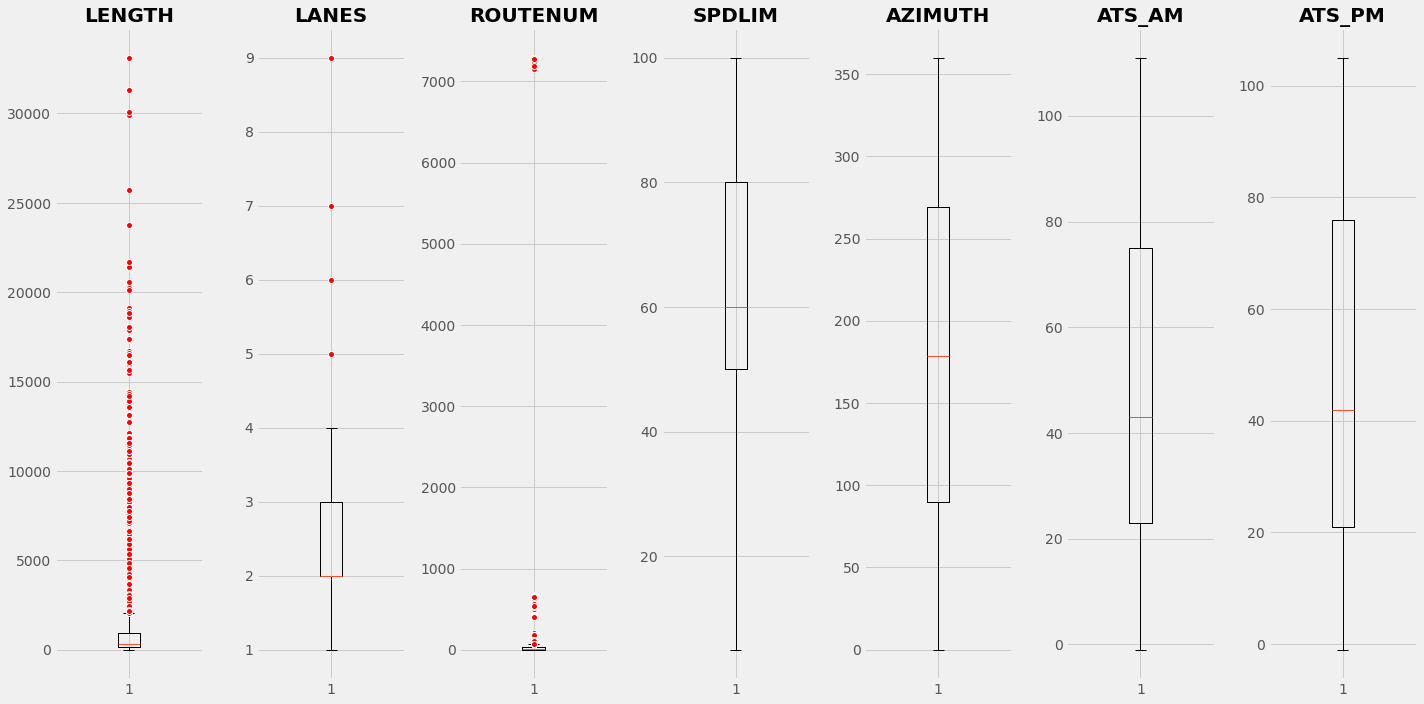

In [224]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub1.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub1.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub1.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
Below is an excellent example where the Travel Time Index (TTI) has a lot of outliers.<br>
It is unrealistic to have TTI be more than ten. I used a logarithmic scale for TTI to better visualize the box plot.<br>
ATS_WN will use the same rules for the speed, and anything above 120km/hr will be considered an outlier.<br> 
DI_AM, DI_PM, DI_WN - represents the Delay Index for AM, PM and Weekend (WN).<br> 
Delay Index (DI) measured in seconds and 3500 seconds are around 58 minutes and sound more or less realistic.<br> 
DI fields will not be prioritized while cleaning the dataset from outliers.

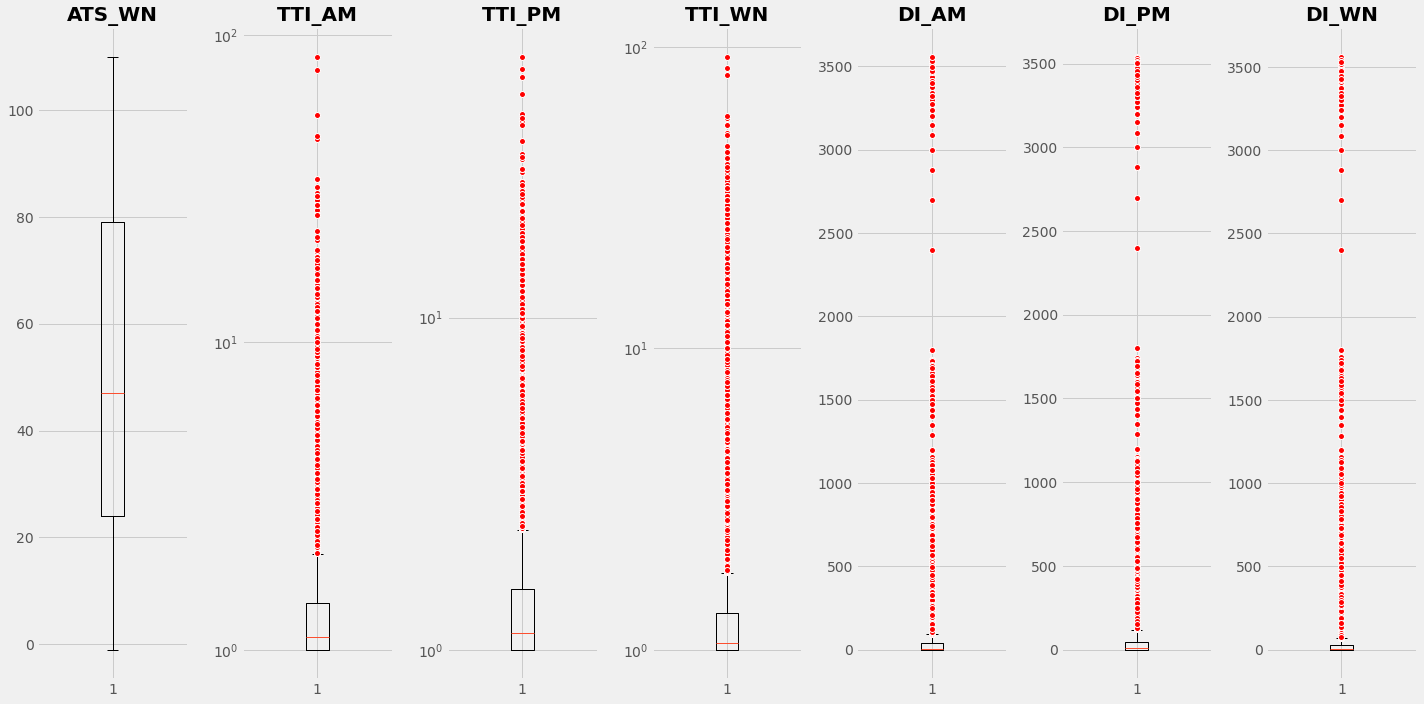

In [227]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub2.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub2.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub2.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
    if df4c_sub2.columns[i] == 'TTI_AM' or df4c_sub2.columns[i] == 'TTI_PM' or df4c_sub2.columns[i] == 'TTI_WN':
        ib.semilogy()
    
plt.tight_layout()

---
Outliers can be easily seen here with Buffer Time Index (BTI). BTI plotted in logarithmic scale.

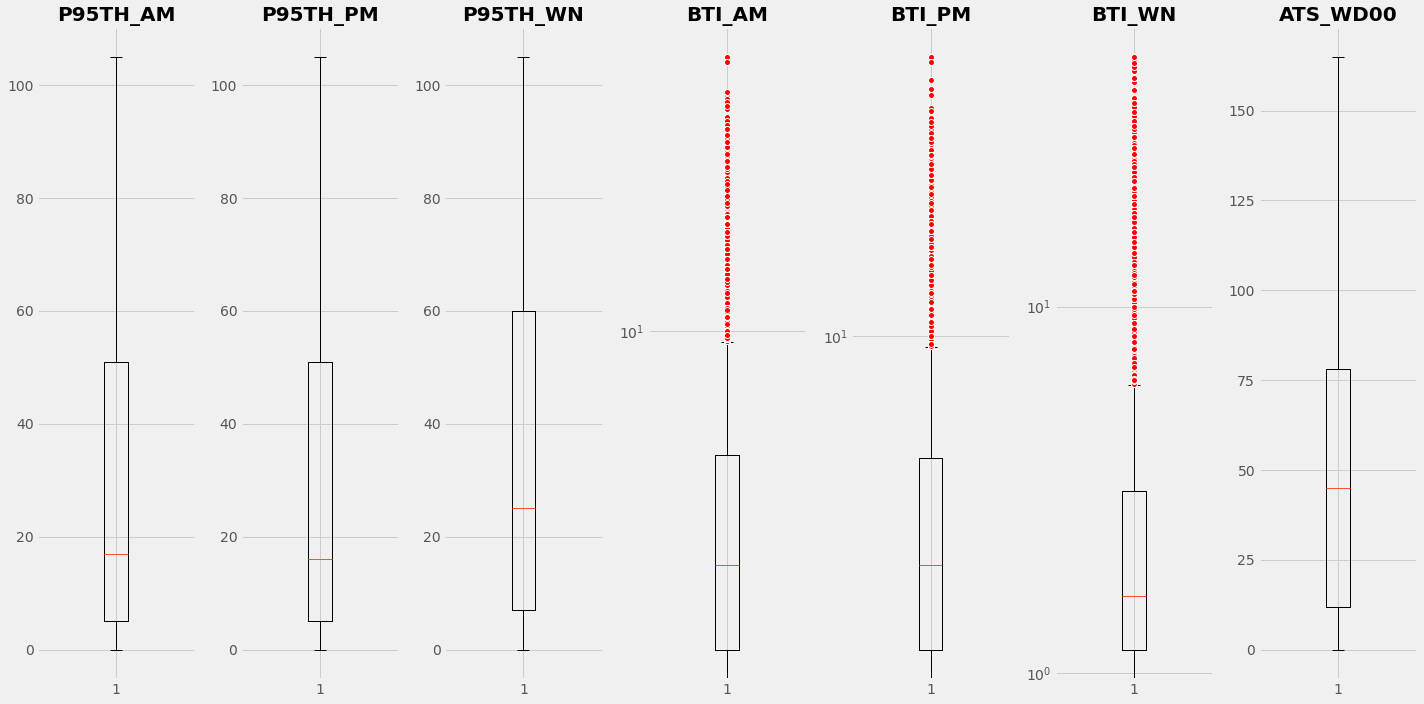

In [232]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub3.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub3.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub3.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
    if df4c_sub3.columns[i] == 'BTI_AM' or df4c_sub3.columns[i] == 'BTI_PM' or df4c_sub3.columns[i] == 'BTI_WN':
        ib.semilogy()
    
plt.tight_layout()

---
ATS_WD05 and ATS_WD06 show clear outliers on top of the box plot.

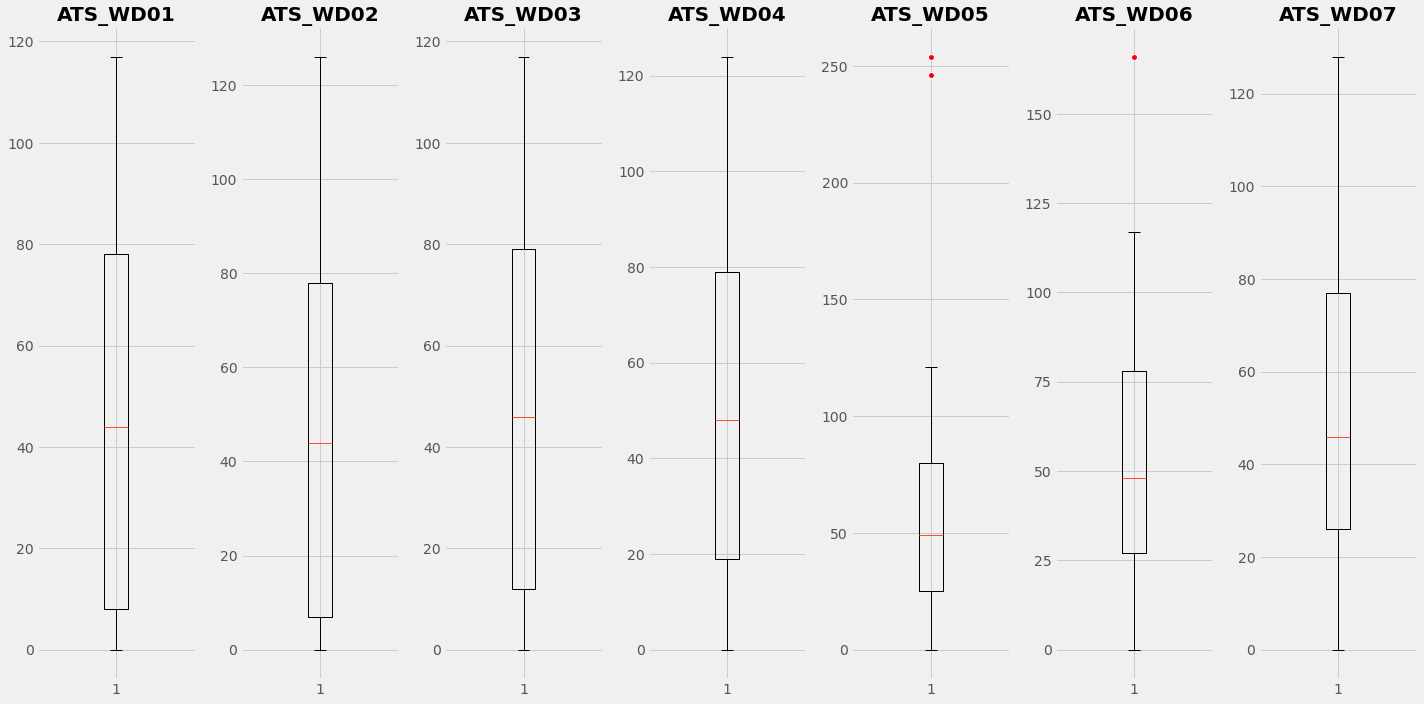

In [233]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub4.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub4.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub4.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
The same line of codes was run before removing the rows majority of columns populated with Zeros.<br> 
Before cleaning below parametrs were indicating far more outliers than it is now.<br> 
Cleaning rows populated mainly with zeros also cleaned the rows where ATS were populated with erroneous data.

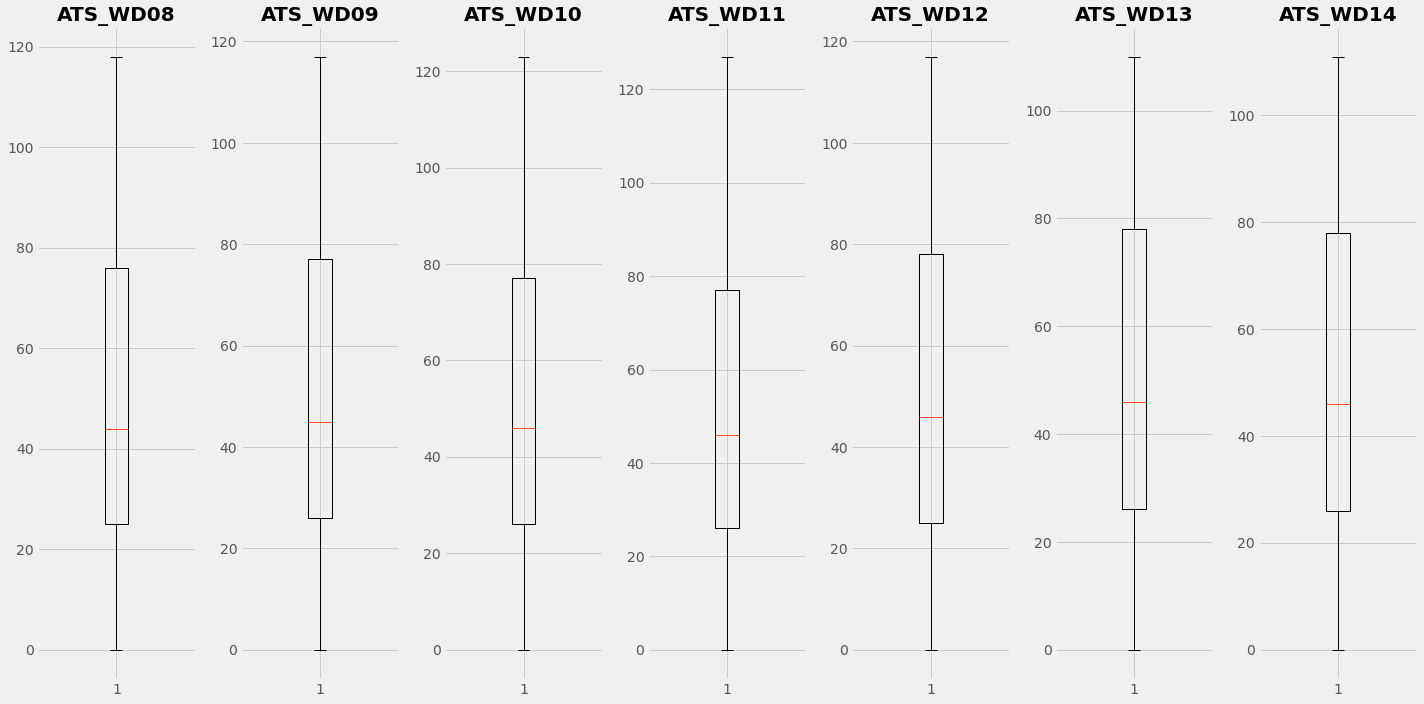

In [234]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub5.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub5.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub5.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
ATS_WD19, ATS_WD20 and ATS_WD21 have few outliers.

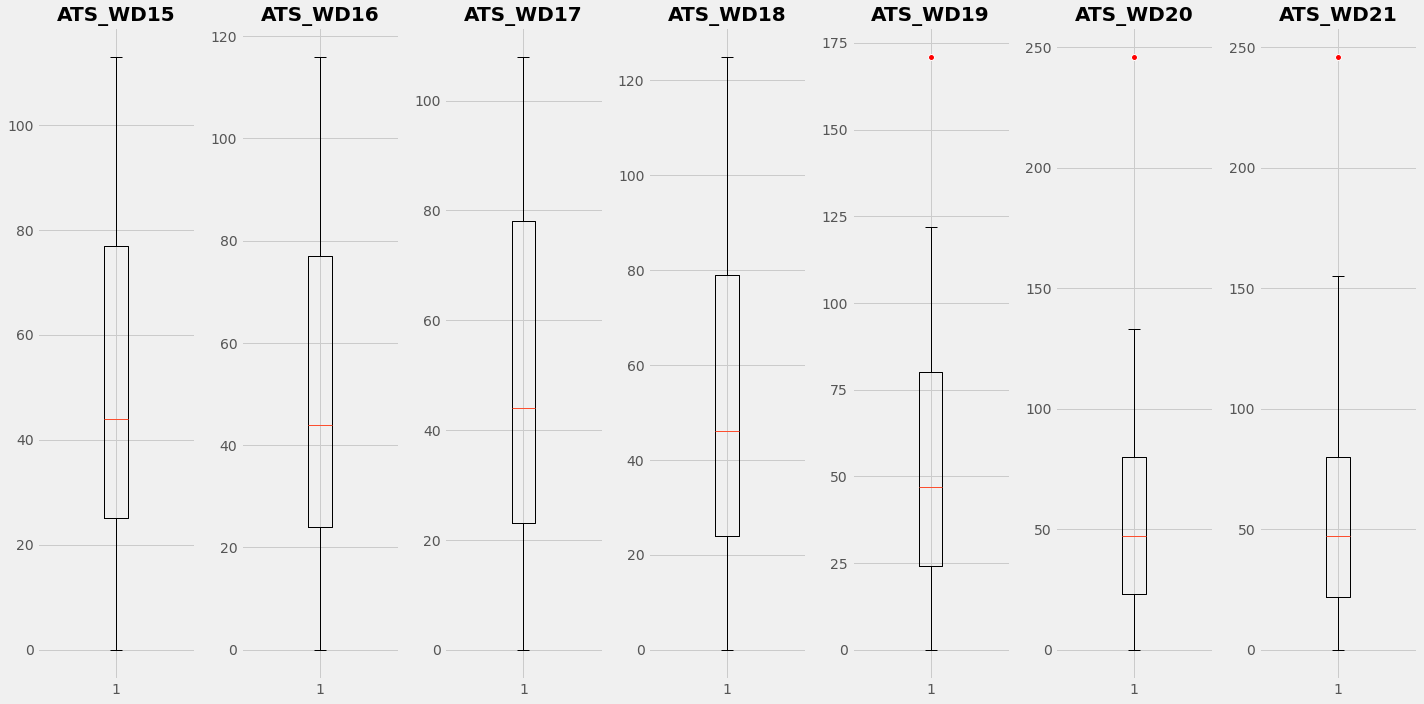

In [235]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub6.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub6.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub6.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
Same for ATS_WD22

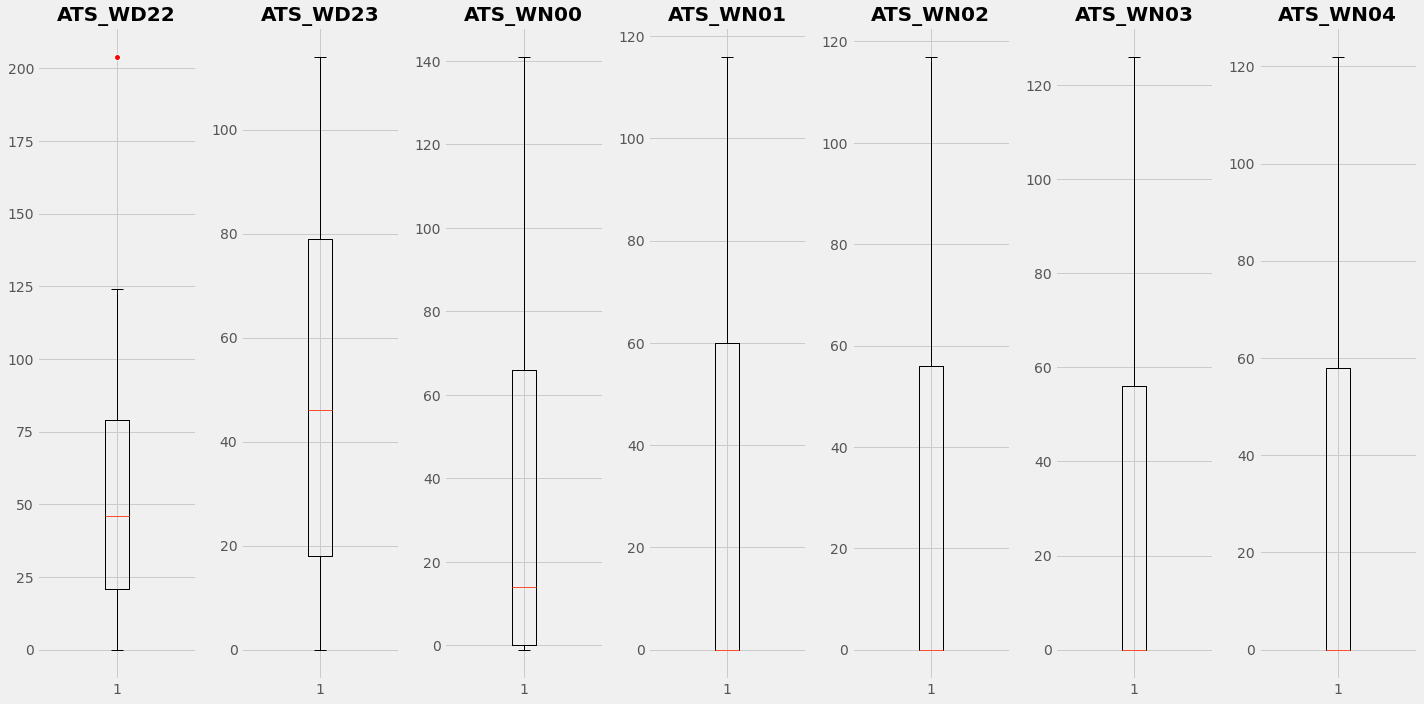

In [236]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub7.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub7.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub7.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
ATS_WN07 has to be cleaned as well.

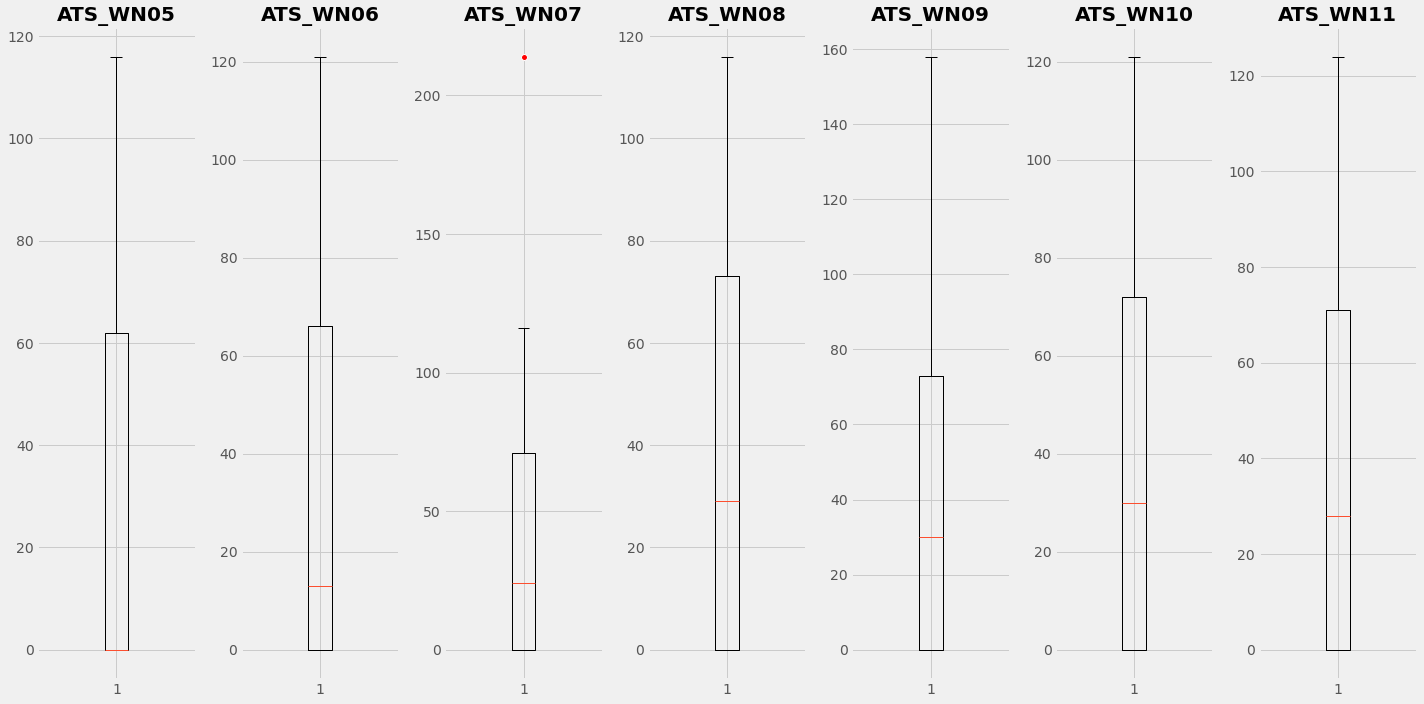

In [238]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub8.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub8.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub8.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
Having data point at a speed of over 200km/hr for ATS_WN12 is unrealistic and can easily be considered junk data points.

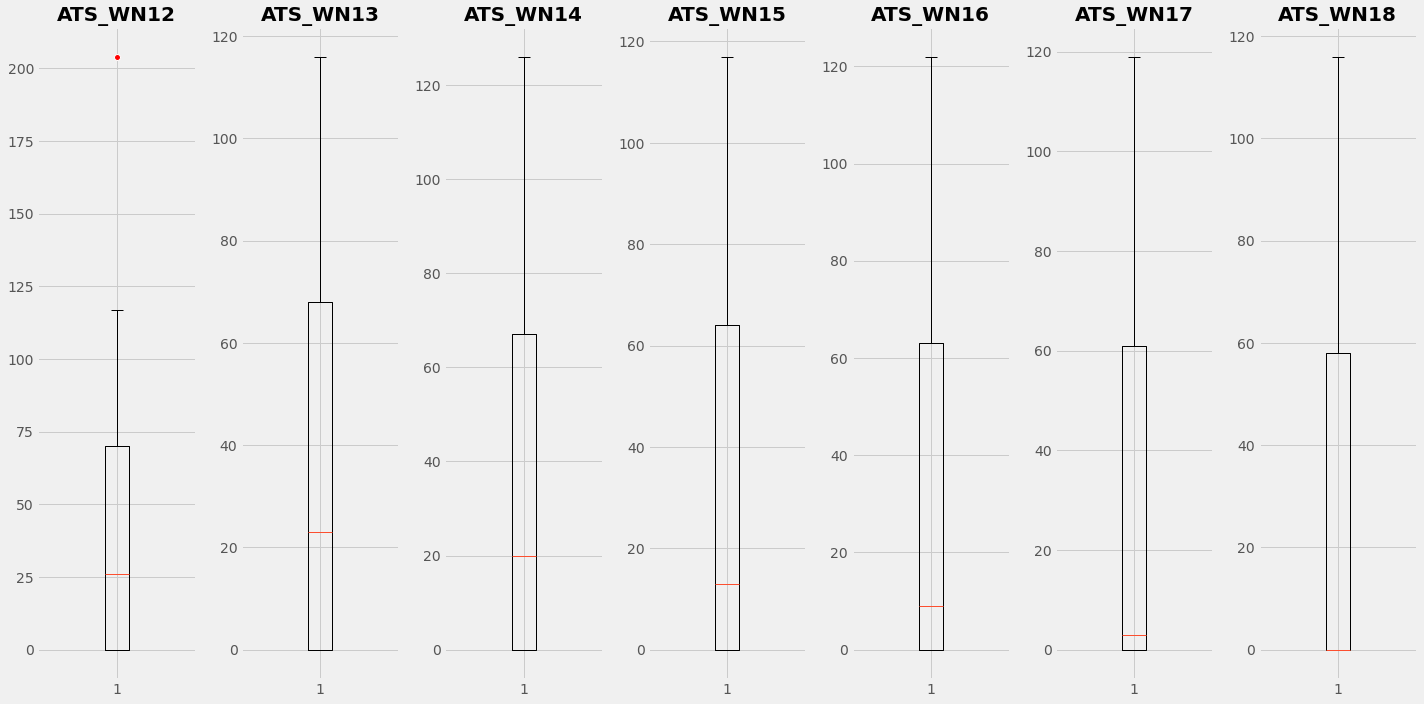

In [239]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub9.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub9.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub9.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

---
Need to check where those high speeds are plotted in the ATS_WN23 box plot.<br> 
If, for example, mainly trucks were driven on city roads at that time of the day, for that reason, this box plot has a lover value 50th percentile, but few were travelling on an empty highway late evening on the weekend.<br>
Those speed data might be real-world data from a truck.

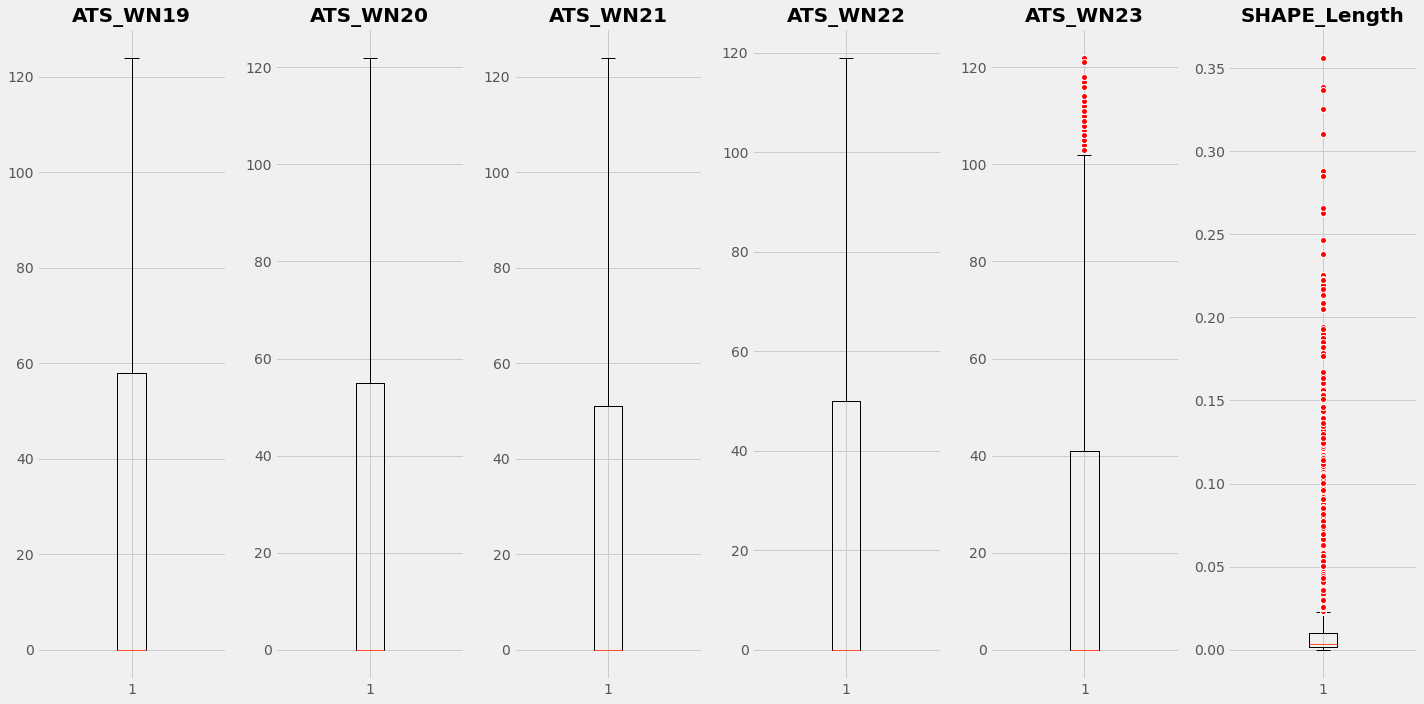

In [240]:
red_circ = dict(markerfacecolor = 'red', marker = 'o', markeredgecolor = 'white')

fig, ibh = plt.subplots(1, len(df4c_sub10.columns), figsize = (20, 10))

for i, ib in enumerate(ibh.flat):
    ib.boxplot(df4c_sub10.iloc[:,i], flierprops = red_circ)
    ib.set_title(df4c_sub10.columns[i], fontsize = 20, fontweight = 'bold')
    ib.tick_params(axis = 'y', labelsize = 14)
    
plt.tight_layout()

### Initial Results and Code
#### GitHub link below